In [31]:
#%pip install openpyxl
#%pip install plotnine

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import plotnine as p9
from plotnine import *
import numpy as np
import re

In [22]:
data_dir = '../../qss20_finalproj_rawdata/summerwork/raw/'
file_location = data_dir + "Adverse_Parties_FW_TRLA.xlsx"

intake = pd.read_excel(file_location)

print(intake.shape)
intake.head()
intake.columns

(11247, 31)


,CaseID/Lead Case #,Case #,Case Disposition,Intake Date,Date Opened,Date Closed,Date of Rejection,Legal Problem Code,County of Dispute,Adverse Party Name,...,Lead Case AP Organization,Lead Case AP Business Name,Lead Case AP Street Address,Lead Case AP Apt#/Suite#,Lead Case AP Street Address 2,Lead Case AP City,Lead Case AP State,Lead Case AP Zip Code,Lead Case AP County,AP Lead Relationship Type
0,20-1037239,20-1037305,Pending,2020-09-09,NaN,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,NaN,"Bernard, Charles",...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
1,20-1037239,20-1050511,Open,2020-11-03,2021-03-04,NaN,NaN,FARMWORKER:OTHER,Out of State,NaN,...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
2,20-1037239,60-12006,Open,2020-04-13,2020-04-13,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,NaN,...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
3,20-1037239,60-12006,Open,2020-04-13,2020-04-13,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,"Bernard, Charles",...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer
4,20-1037239,60-12008,Open,2020-05-18,2020-05-18,NaN,NaN,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,"Bernard, Charles",...,"Crawfish Processing, LLC","Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer


Index(['CaseID/Lead Case #', 'Case #', 'Case Disposition', 'Intake Date',
       'Date Opened', 'Date Closed', 'Date of Rejection', 'Legal Problem Code',
       'County of Dispute', 'Adverse Party Name', 'Adverse Party Organization',
       'AP Business Name', 'AP Apt#/Suite#', 'AP Street Address',
       'AP Street Address 2', 'AP City', 'AP State', 'AP Zip Code',
       'AP County', 'AP Relationship Type', 'Lead Case AP Name',
       'Lead Case AP Organization', 'Lead Case AP Business Name',
       'Lead Case AP Street Address', 'Lead Case AP Apt#/Suite#',
       'Lead Case AP Street Address 2', 'Lead Case AP City',
       'Lead Case AP State', 'Lead Case AP Zip Code', 'Lead Case AP County',
       'AP Lead Relationship Type'],
      dtype='object')

In [29]:
print(intake['CaseID/Lead Case #'].count())
print(intake['Case #'].count())

intake.info()

## case number is equal to the number of rows
## but case id is missing for 25% approx-- what's the unique identifier?
intake.shape

7282
11247
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11247 entries, 0 to 11246
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CaseID/Lead Case #             7282 non-null   object        
 1   Case #                         11247 non-null  object        
 2   Case Disposition               11247 non-null  object        
 3   Intake Date                    11208 non-null  datetime64[ns]
 4   Date Opened                    11202 non-null  datetime64[ns]
 5   Date Closed                    10737 non-null  datetime64[ns]
 6   Date of Rejection              20 non-null     datetime64[ns]
 7   Legal Problem Code             11247 non-null  object        
 8   County of Dispute              2649 non-null   object        
 9   Adverse Party Name             2302 non-null   object        
 10  Adverse Party Organization     3545 non-null   object        
 11  AP B

(11247, 32)

In [24]:
intake['Intake Date'] = pd.to_datetime(intake['Intake Date'])
intake['Date Opened'] = pd.to_datetime(intake['Date Opened'])
intake['Date Closed'] = pd.to_datetime(intake['Date Closed'])
intake['Date of Rejection'] = pd.to_datetime(intake['Date of Rejection'])

In [25]:
legal_problem_counts = intake['Legal Problem Code'].value_counts(dropna = False).to_frame().reset_index()
legal_problem_counts = legal_problem_counts.rename(columns = {'index':'Legal Problem Code', 
                                                              'Legal Problem Code': 'Count'})
legal_problem_counts['h2a'] = np.where(legal_problem_counts['Legal Problem Code'].str.contains('H-2A') |
                                       legal_problem_counts['Legal Problem Code'].str.contains('H2A'), 1, None)

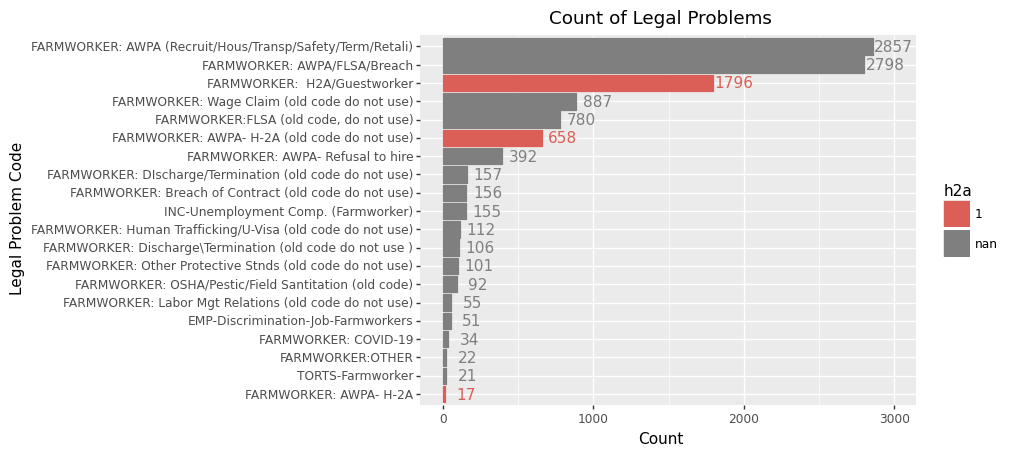

<ggplot: (8780028411603)>

In [26]:
ggplot(legal_problem_counts, aes(x = 'Legal Problem Code', y = 'Count', fill = 'h2a', color = 'h2a')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 140) + \
    scale_x_discrete(limits = legal_problem_counts['Legal Problem Code'][::-1]) + \
    coord_flip() + \
    labs(title = 'Count of Legal Problems')

In [27]:
intake['intake_ym'] = intake['Intake Date'].astype('datetime64[M]')
intake.intake_ym


0       2020-09-01
1       2020-11-01
2       2020-04-01
3       2020-04-01
4       2020-05-01
           ...    
11242   2021-06-01
11243   2019-11-01
11244   2020-03-01
11245   2018-01-01
11246   2021-05-01
Name: intake_ym, Length: 11247, dtype: datetime64[ns]

/usr/local/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 39 rows containing non-finite values.


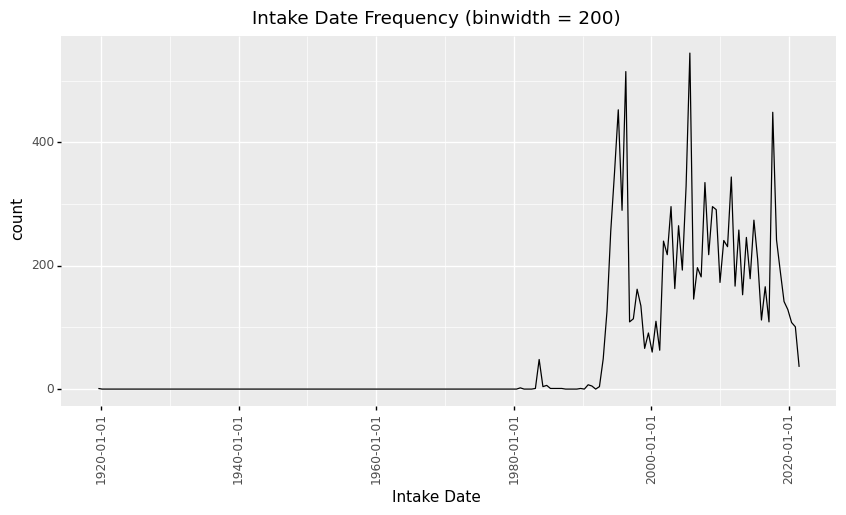

<ggplot: (286385083)>

In [8]:
p9.options.figure_size = (10, 4.8)

ggplot(intake, aes('Intake Date')) + \
    geom_freqpoly(binwidth = 200) + \
    theme(axis_text_x = element_text(angle = 90)) + \
    labs(title = 'Intake Date Frequency (binwidth = 200)')

In [9]:
state_counts = intake['AP State'].value_counts(dropna = False).to_frame().reset_index()
state_counts = state_counts.rename(columns = {'index': 'AP State', 'AP State': 'Count'})
state_counts["trla_catchment"] = np.where(state_counts['AP State'].isin(['TX', 'MS', 'LA', 'KY', 'AL', 'TN']), 1, None)

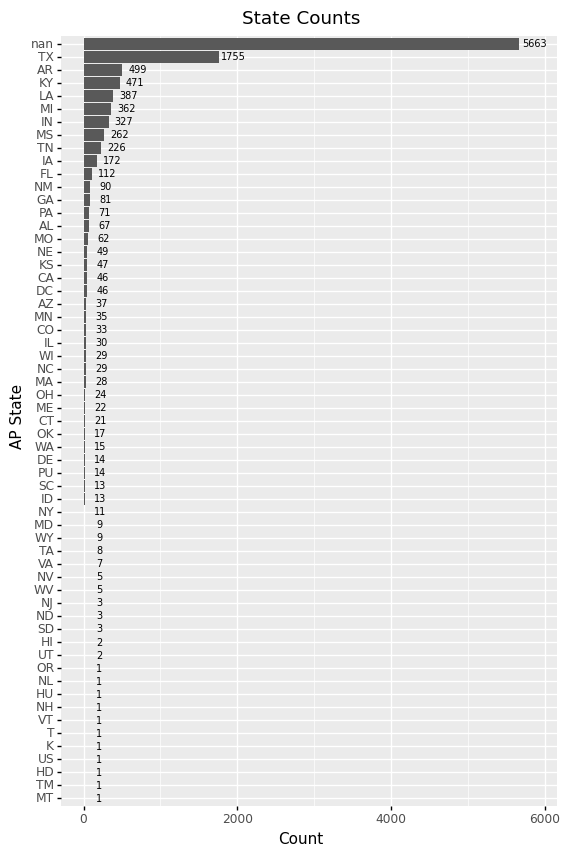

<ggplot: (310629407)>

In [10]:
p9.options.figure_size = (6.4, 10)

ggplot(state_counts, aes(x = 'AP State', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 200, size = 7) + \
    scale_x_discrete(limits = state_counts['AP State'][::-1]) + \
    coord_flip() + \
    labs(title = 'State Counts')

In [11]:
p9.options.figure_size = (6.4, 4.8)

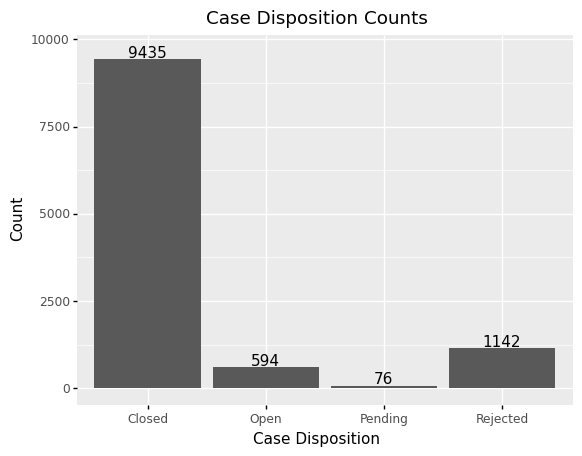

<ggplot: (310852069)>

In [12]:
dispo_counts = intake['Case Disposition'].value_counts(dropna = False).to_frame().reset_index()
dispo_counts = dispo_counts.rename(columns = {'index': 'Case Disposition', 'Case Disposition': 'Count'})

ggplot(dispo_counts, aes(x = 'Case Disposition', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 200) + \
    labs(title = 'Case Disposition Counts')

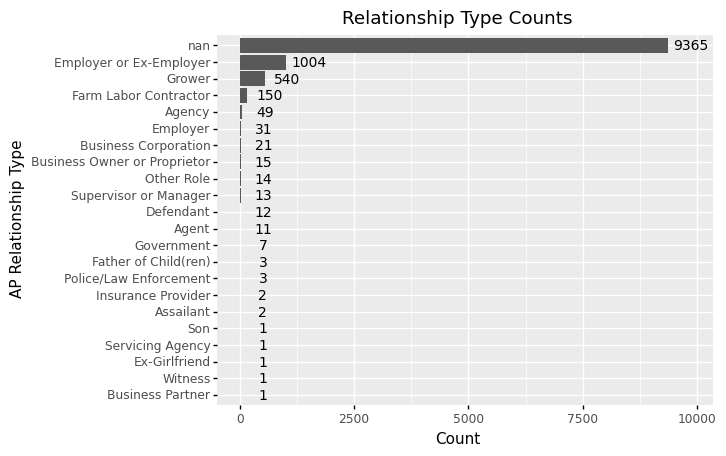

<ggplot: (310883301)>

In [13]:
relat_counts = intake['AP Relationship Type'].value_counts(dropna = False).to_frame().reset_index()
relat_counts = relat_counts.rename(columns = {'index': 'AP Relationship Type', 'AP Relationship Type': 'Count'})

ggplot(relat_counts, aes(x = 'AP Relationship Type', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 500, size = 10) + \
    scale_x_discrete(limits = relat_counts['AP Relationship Type'][::-1]) + \
    coord_flip() + \
    labs(title = 'Relationship Type Counts')

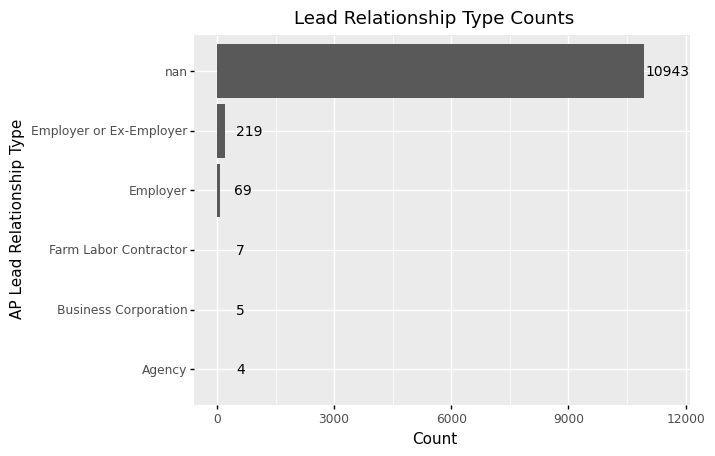

<ggplot: (310942458)>

In [14]:
lead_relat_counts = intake['AP Lead Relationship Type'].value_counts(dropna = False).to_frame().reset_index()
lead_relat_counts = lead_relat_counts.rename(columns = {'index': 'AP Lead Relationship Type', 
                                                        'AP Lead Relationship Type': 'Count'})

ggplot(lead_relat_counts, aes(x = 'AP Lead Relationship Type', y = 'Count')) + \
    geom_bar(stat = 'identity') + \
    geom_text(aes(label = 'Count'), nudge_y = 600, size = 10) + \
    scale_x_discrete(limits = lead_relat_counts['AP Lead Relationship Type'][::-1]) + \
    coord_flip() + \
    labs(title = 'Lead Relationship Type Counts')

## Compare counts to whd counts for status update

In [17]:
## for later- how to code these if missing all three?
intake['Adverse Party Name'].value_counts(dropna = False)
intake['Adverse Party Organization'].value_counts(dropna = False)
intake['Lead Case AP Organization'].value_counts(dropna = False)


NaN                           8945
Mendoza Jr., Abelardo Lalo     106
Fritz, William G                46
Brolick, Richard                46
Lowry, Clay                     34
                              ... 
Inbanez, Baldomedo               1
Davis, Randy                     1
Vicencia, Rafael                 1
Griffin, Derring                 1
Morgan, Michael                  1
Name: Adverse Party Name, Length: 879, dtype: int64

NaN                                        7702
HUBNER FARMS                                114
Remington Hybrid Seed Company, Inc.         109
Social Security Administration - Austin     106
Pioneer Hi-Bred International, Inc.          51
                                           ... 
La Jolla Lawn & Tree/Joe Diaz                 1
Coning Family Farms                           1
U.S. Courier and Logistics                    1
Bravo Harvesting, Inc.                        1
Chiquita Processed Foods, LLC                 1
Name: Adverse Party Organization, Length: 1334, dtype: int64

NaN                                         11043
Lowry Farms, Inc.                              68
Hood Brothers Farms                            31
Marin J Corp                                   17
Gulf Citrus Harvesting and Hauling, Inc.       13
Monsanto Company                               13
Crawfish Processing, LLC                       12
U.S. Department of Labor                       11
Vaz Mar                                         5
Mills Trucking and Custom Harvesting            5
Seneca Foods                                    5
David Talley Farm                               5
Seventy One Plantations                         5
SALEM OPERATING JV                              4
Puentes Farms                                   3
Tate Farms                                      3
Flowerwood Nursery                              2
J&S Surface                                     2
Name: Lead Case AP Organization, dtype: int64

In [51]:
## filter to:
## 2014 or later
## rename cols

intake_14on = intake[intake.intake_ym > '2014-01-01']
clean_cols = [re.sub("\/|\#", "", re.sub("\s+", "_", one_col)) for one_col in intake_14on.columns]
intake_14on.columns = clean_cols

intake_14on.head()
## pull up one with missing case id
intake_14on['missing_caseidlead'] = np.where(intake_14on.CaseIDLead_Case_.isnull(), 
                                            True, False)

## use case number as identifier, and plot by month
unique_calls_bymonth = intake_14on.groupby(['intake_ym']).agg({'Case_': lambda x: len(x.unique())}).reset_index()
unique_calls_bymonth.columns = ['intake_ym', 'count_calls_trla']


,CaseIDLead_Case_,Case_,Case_Disposition,Intake_Date,Date_Opened,Date_Closed,Date_of_Rejection,Legal_Problem_Code,County_of_Dispute,Adverse_Party_Name,...,Lead_Case_AP_Business_Name,Lead_Case_AP_Street_Address,Lead_Case_AP_AptSuite,Lead_Case_AP_Street_Address_2,Lead_Case_AP_City,Lead_Case_AP_State,Lead_Case_AP_Zip_Code,Lead_Case_AP_County,AP_Lead_Relationship_Type,intake_ym
0,20-1037239,20-1037305,Pending,2020-09-09,NaT,NaT,NaT,FARMWORKER: AWPA/FLSA/Breach,NaN,"Bernard, Charles",...,"Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer,2020-09-01
1,20-1037239,20-1050511,Open,2020-11-03,2021-03-04,NaT,NaT,FARMWORKER:OTHER,Out of State,NaN,...,"Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer,2020-11-01
2,20-1037239,60-12006,Open,2020-04-13,2020-04-13,NaT,NaT,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,NaN,...,"Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer,2020-04-01
3,20-1037239,60-12006,Open,2020-04-13,2020-04-13,NaT,NaT,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,"Bernard, Charles",...,"Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer,2020-04-01
4,20-1037239,60-12008,Open,2020-05-18,2020-05-18,NaT,NaT,FARMWORKER: AWPA/FLSA/Breach,Avoyelles,"Bernard, Charles",...,"Crawfish Processing, LLC",155 S PRESTON ST,NaN,NaN,Marksville,LA,71351.0,NaN,Employer,2020-05-01


<ipython-input-51-3933e07cf7fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:

## load whishard
trla_catchment = ['TX', 'MS', 'LA', 'KY', 'AL','TN']
whd_intake = pd.read_csv(data_dir + "whd_whisard.csv")
whd_intake['intake_ym'] = pd.to_datetime(whd_intake.findings_start_date,
                                        errors = "coerce").astype('datetime64[M]')
whd_h2a_trla = whd_intake[(whd_intake.h2a_violtn_cnt > 0) & 
                         (whd_intake.st_cd.isin(trla_catchment))].copy()
whd_h2a_trla.head()

## same agg
unique_dol_bymonth = whd_h2a_trla.groupby(['intake_ym']).agg({'case_id': lambda x: len(x.unique())}).reset_index()
unique_dol_bymonth.columns = ['intake_ym', 'count_dol']

,case_id,trade_nm,legal_name,street_addr_1_txt,cty_nm,st_cd,zip_cd,naic_cd,naics_code_description,case_violtn_cnt,...,flsa_smwsl_ee_atp_cnt,eev_violtn_cnt,h2b_violtn_cnt,h2b_bw_atp_amt,h2b_ee_atp_cnt,sraw_violtn_cnt,sraw_bw_atp_amt,sraw_ee_atp_cnt,ld_dt,intake_ym
174,1762079,Back Forty Blueberry Nursery,"Back Forty Blueberry Nursery, LLC",210 Davis Singletary Road,Waynesboro,MS,39367.0,111334.0,Berry (except Strawberry) Farming,7,...,0,0,0,0.0,0,0,0.0,0,2016-02-19 01:00:04 EST,2014-05-01
2089,1722071,Cottage Hill Nursery,T.A.S. Inc,9960 Padgett Switch Road,Irvington,AL,36544.0,11142.0,Nursery and Floriculture Production,4,...,0,0,0,0.0,0,0,0.0,0,2016-02-19 01:00:04 EST,2012-03-01
2423,1745990,"Melancon Sugarcane Farms, Inc","Melancon Sugarcane Farms, Inc",1090 Banker Rd,Saint Martinville,LA,70582.0,111930.0,Sugarcane Farming,7,...,0,0,0,0.0,0,0,0.0,0,2016-02-19 01:00:04 EST,2013-03-01
2915,1515300,Michael W. Roberts Farm,Michael W. Roberts Farm,4644 Mulberry Pike,Eminence,KY,40019.0,111910.0,Tobacco Farming,17,...,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST,2006-06-01
4147,1457623,David and Jamie Jones,Jones Farm,830 Stewart Road,Wingo,KY,42088.0,111910.0,Tobacco Farming,10,...,0,0,0,0.0,0,0,0.0,0,2015-02-20 01:00:06 EST,2004-11-01


,count_calls_trla,count_dol
count,80.000000,80.00000
mean,19.950000,3.51250
std,12.446239,3.69397
min,2.000000,0.00000
25%,11.750000,1.00000
50%,17.500000,2.00000
75%,25.000000,5.00000
max,69.000000,16.00000


,intake_ym,count_calls_trla,count_dol
0,2014-02-01,13,2.0
1,2014-03-01,17,6.0
2,2014-04-01,15,6.0
3,2014-05-01,31,12.0
4,2014-06-01,12,6.0


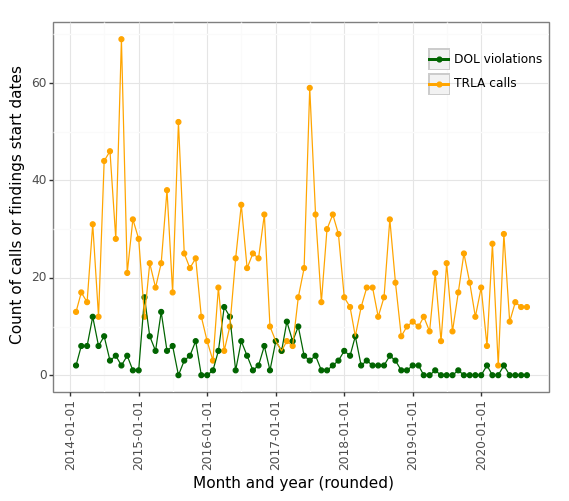

<ggplot: (8779896849122)>

In [79]:
## create months dataset to left join to in case either missing months
all_months = pd.DataFrame({'intake_ym': pd.date_range('2014-02-01', 
                           end = '2020-09-01', 
                           freq='MS')})

## left join trla
all_m_trla = pd.merge(all_months, 
                     unique_calls_bymonth,
                     on = "intake_ym",
                     how = "left")

all_m_trla['count_calls_trla'].fillna(0, inplace = True)
all_m_both = pd.merge(all_m_trla,
                     unique_dol_bymonth,
                     on = 'intake_ym',
                     how = "left")
all_m_both['count_dol'].fillna(0, inplace = True)
all_m_both.describe()

## melt to longform
all_m_both.head()
all_m_both_long = pd.melt(all_m_both, id_vars = 'intake_ym')
all_m_both_long['type'] = np.where(all_m_both_long.variable.str.contains("trla"),
                                  "TRLA calls",
                                  "DOL violations")

(ggplot(all_m_both_long, aes(x = 'intake_ym', 
                            y = 'value',
                            group = 'type', 
                            color = 'type')) +
geom_point() +
theme_bw() +
labs(color = "") +
xlab("Month and year (rounded)") +
ylab("Count of calls or findings start dates") +
theme(axis_text_x = element_text(angle = 90),
     legend_position = (0.8, 0.8),
     legend_background = element_blank()) +
scale_color_manual(values = ('darkgreen', 'orange')) +
geom_line())

